# Part I - Ford GoBike System Data
## by Michael Johnson

## Introduction

>This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.  This dataset is from 2019 based on the filename of the data and looks at the location, duration of bike rentals and has a handful of customer variables such as birth year, user type, and gender.

## Preliminary Wrangling

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [2]:
bike_data_df = pd.read_csv('201902-fordgobike-tripdata.csv')
print(bike_data_df.shape)
print(bike_data_df.dtypes)
print(bike_data_df.head(5))

(183412, 16)
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object
   duration_sec                start_time                  end_time  \
0         52185  2019-02-28 17:32:10.1450  2019-03-01 08:01:55.9750   
1         42521  2019-02-28 18:53:21.7890  2019-03-01 06:42:03.0560   
2         61854  2019-02-28 12:13:13.2180  2019-03-01 05:24:08.1460   
3         36490  2019-02-28 17:54:26.0100  2019-03-01 04:02:36.8420   
4          1585  2019-02-28 23:54:18.5490  2019-03-01 00:2

### Convert columns to correct dtypes
start_station_id <- Convert to int \
end_station_id <- Convert to int \
member_birth_year <- Convert to int \
user_type <- Categorize (Subscriber, Customer) \
member_gender  <- Categorize (Male, Female, Other) \
start_time <- Convert to datetime \
end_time <- Convert to datetime \
bike_share_for_all_trip  <- Categorize (Yes, No)


In [3]:
bike_data_df = bike_data_df.dropna()

In [4]:
bike_data_df = bike_data_df.astype({'start_station_id': 'int32', 'end_station_id': 'int32', 'member_birth_year': 'int32'})
bike_data_df.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id             int32
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id               int32
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year            int32
member_gender               object
bike_share_for_all_trip     object
dtype: object

In [5]:
ordinal_var_dict = {'user_type': ['Subscriber', 'Customer'],
                   'member_gender': ['Male', 'Female', 'Other'],
                   'bike_share_for_all_trip': ['Yes', 'No']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                               categories = ordinal_var_dict[var])
    bike_data_df[var] = bike_data_df[var].astype(ordered_var)

### What is the structure of your dataset?

> There are 180,000+ records in the dataset with 16 features. \
\
**Integer variables:** \
duration_sec \
start_station_id <- converted from float to int \
end_station_id <- converted from float to int \
bike_id \
member_birth_year <- converted from float to int \
\
**Float Variables:** \
start_station_latitude \
start_station_longitude \
end_station_latitude \
end_station_longtitude \
\
**Object Variables:** \
start_station_name \
end_station_name \
user_type <- Categorize (Subscriber, Customer) \
member_gender  <- Categorize (Male, Female, Other) \
bike_share_for_all_trip <- Categorize (Yes, No) \
\
**Datetime Variables:** \
start_time \
end_time 




### What is/are the main feature(s) of interest in your dataset?

> I am interested to see which stations are the most popular stations to rent bikes from.  Also, I would like to \
look at the average length of the rentals and the average age or renters and subscriber vs. rental data. \

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The start & end time, age, user type, and start & end stations will all help with supporting the investigation of the interests above

## Univariate Exploration

In [6]:
gender_counts = bike_data_df['member_gender'].value_counts()
total_counts = bike_data_df['member_gender'].value_counts(normalize=True)

total_counts

Male      0.745919
Female    0.233235
Other     0.020846
Name: member_gender, dtype: float64

<AxesSubplot: xlabel='proportion', ylabel='member_gender'>

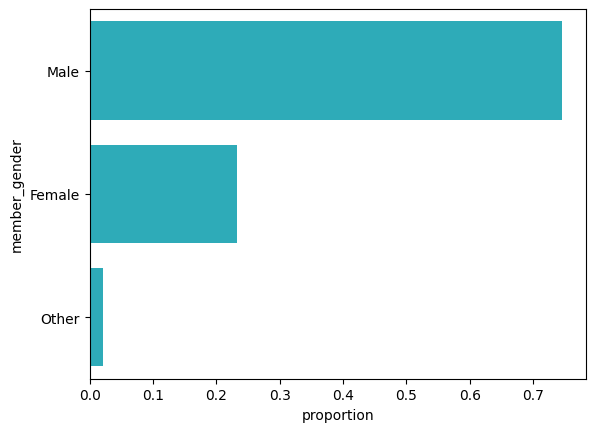

In [7]:
total_counts = total_counts.reset_index(drop=False)
total_counts = total_counts.rename(columns={'index': 'member_gender', 'member_gender': 'proportion'})

sns.barplot(data=total_counts, x='proportion', y='member_gender', color=sns.color_palette()[9])

<AxesSubplot: xlabel='age', ylabel='Count'>

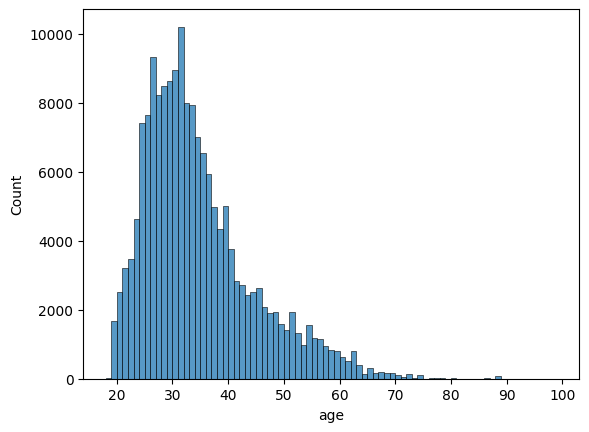

In [8]:
bike_data_df['age'] = 2019 - bike_data_df['member_birth_year']
bins = np.arange(18, 100, 1)
sns.histplot(data=bike_data_df, x='age', bins=bins)

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Males make up almost 75% of the riders, whereas females make up about 25%.  In addition, the histogram shows that majority of the riders were born between 1980-1996 making their age approximately 24-40 years old.    

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The bar chart and histogram make sense, as bike riding is more appealing to younger people due to the physical aspect of it.  For the bar chart, I made the counts proportionate rather than leaving as their value counts.  By doing a proportion it gives you a better idea for the ratio of genders riding the bicycles.  For the histogram, sorting the data into bins by year helped show a good representation for the age of riders.  There were a few outliers >100 years old, but I decided to remove those to make the graph easier to understand


## Bivariate Exploration

In [9]:
start_station_counts = bike_data_df['start_station_name'].value_counts()
end_station_counts = bike_data_df['end_station_name'].value_counts()

Text(0, 0.5, 'End Station Name')

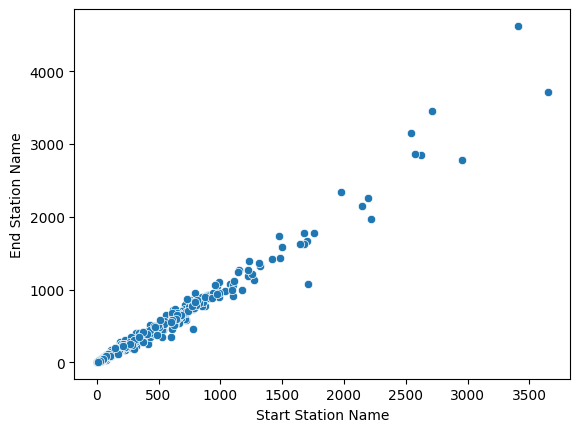

In [10]:
sns.scatterplot(data=bike_data_df, x=bike_data_df['start_station_name'].value_counts(), y=bike_data_df['end_station_name'].value_counts())
plt.xlabel('Start Station Name')
plt.ylabel('End Station Name')

In [11]:
start_station_counts.nlargest(7)

Market St at 10th St                                         3649
San Francisco Caltrain Station 2  (Townsend St at 4th St)    3408
Berry St at 4th St                                           2952
Montgomery St BART Station (Market St at 2nd St)             2711
Powell St BART Station (Market St at 4th St)                 2620
San Francisco Caltrain (Townsend St at 4th St)               2577
San Francisco Ferry Building (Harry Bridges Plaza)           2541
Name: start_station_name, dtype: int64

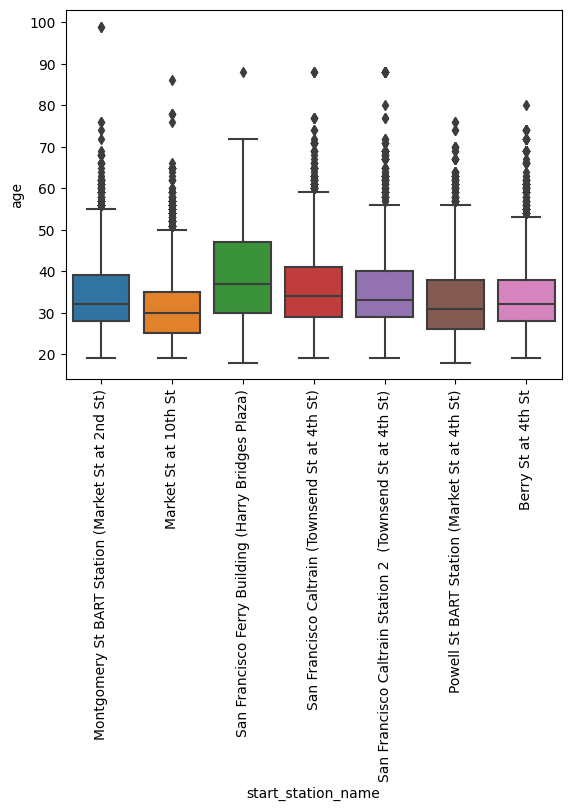

In [12]:

top_stations = ['San Francisco Caltrain Station 2  (Townsend St at 4th St)', 'Market St at 10th St', 'Montgomery St BART Station (Market St at 2nd St)', 'Berry St at 4th St', 'San Francisco Ferry Building (Harry Bridges Plaza)', 'San Francisco Caltrain (Townsend St at 4th St)', 'Powell St BART Station (Market St at 4th St)']
bike_data_sample = bike_data_df.loc[bike_data_df['start_station_name'].isin(top_stations)]
bike_data_sample = bike_data_sample.loc[bike_data_sample['age'] <= 100]

# bike_data_sample = bike_data_df.loc[bike_data_df['start_station_name'] == 'San Francisco Caltrain Station 2  (Townsend St at 4th St)']
sns.boxplot(data=bike_data_sample, x='start_station_name', y = 'age')
plt.xticks(rotation=90);

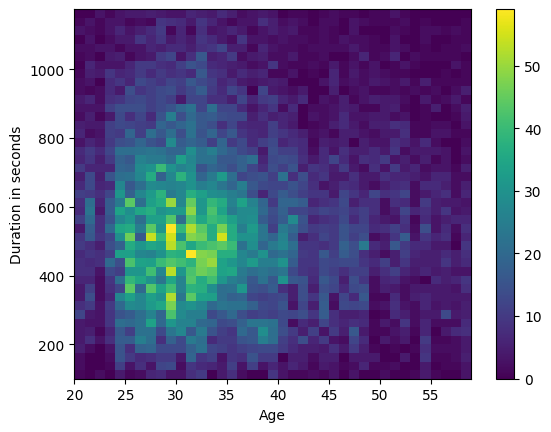

In [13]:
bike_data_sample = bike_data_sample.loc[bike_data_sample['age'] <= 90]

bins_x = np.arange(20, 60, 1)
bins_y = np.arange(100, 1200, 25)

plt.hist2d(data=bike_data_sample, x='age', y='duration_sec', bins=[bins_x, bins_y])
plt.colorbar()
plt.xlabel('Age')
plt.ylabel('Duration in seconds');



### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The scatterplot showed which stations are started and ended at the most.  The top stations were Market St at 10th St, San Francisco Caltrain Station 2  (Townsend St at 4th St), Berry St at 4th St, Montgomery St BART Station (Market St at 2nd St), Powell St BART Station (Market St at 4th St), San Francisco Caltrain (Townsend St at 4th St), and San Francisco Ferry Building (Harry Bridges Plaza).  From these top 7 stations, the box plots show the common ages for each station.  The San Francisco Ferry Building has a generally older group of riders on average.  The reason for this could be that it is near a touristy area of San Francisco.  Another reason could be that the Ferry building is on the water and could make for a nice bike ride in terms of scenery.    

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> The Heat map shows that generally the most common riders are between age 25-35 and ride for 300-700 seconds (5-12 minutes)  

## Multivariate Exploration

/opt/venv/lib/python3.10/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/opt/venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  self._figure.tight_layout(*args, **kwargs)


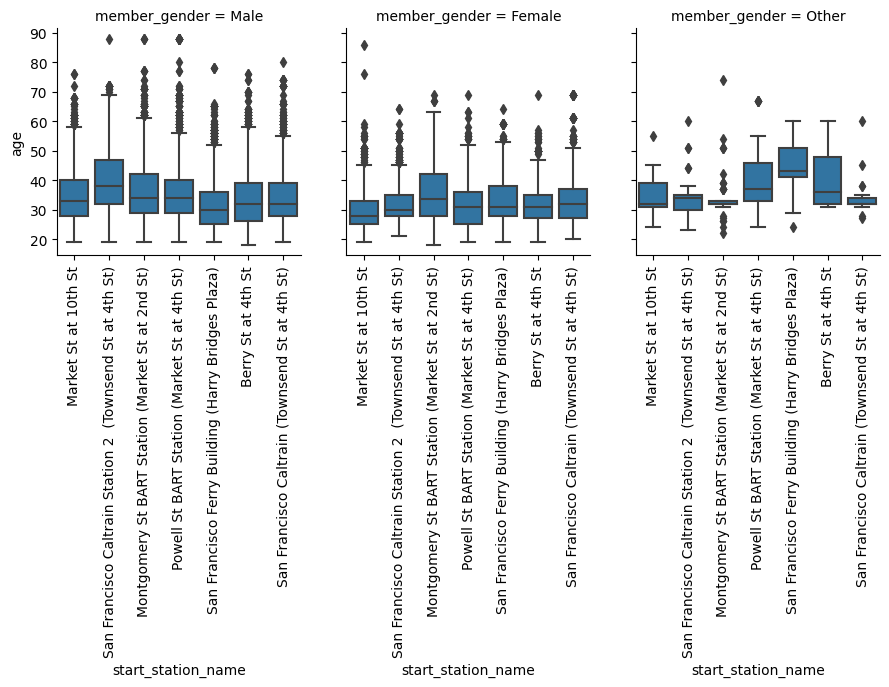

In [14]:
g = sns.FacetGrid(data=bike_data_sample, col = 'member_gender', margin_titles=True)
g.map(sns.boxplot, 'start_station_name', 'age')
for ax in g.axes.flat:
    _ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

(-100.0, 2000.0)

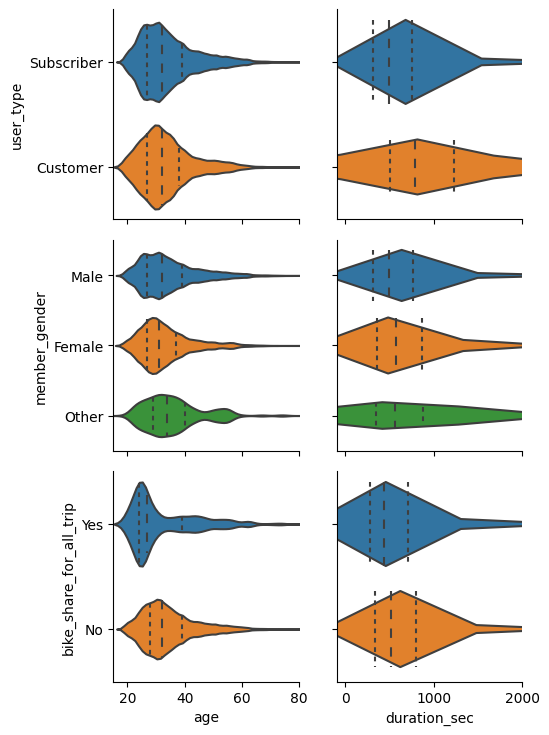

In [15]:
# stats = ['age', 'duration_sec']
# g = sns.PairGrid(data=bike_data_sample, vars=stats);
# g.map_offdiag(plt.scatter);
# g.map_diag(plt.hist);
bike_data_sample = bike_data_sample.loc[bike_data_sample['age'] <= 90]
g = sns.PairGrid(data=bike_data_df, x_vars=['age', 'duration_sec'],
                y_vars=['user_type', 'member_gender', 'bike_share_for_all_trip'])
g.map(sns.violinplot, inner='quartile')
g.axes[0,0].set_xlim(15, 80)
g.axes[1,1].set_xlim(-100,2000)

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> One of the first things I wanted to take away from these graphs were if there were any noticable observations depending on the bike rider's age based on the station they were leaving from.  Does the more touristy areas such as the Ferry Building have an older average age?  Out of the top 7 used rental locations, is there a noticable difference in age?  In addition, does the gender matter?  Based on the first Facet plot, it looks like for males, the San Francisco Caltrain and Montgomery BART stations have the oldest riders.  For females, the Montgomery BART station has on average the oldest riders as well.  When comparing both genders, the biggest difference in age can be seen at the Market st and San Francisco Caltrain stations, where the average age for males looks to be around 34 and 39 respectively.  For females, the average ages look to be 29 and 30 respectively. More research would need to be done, but one hypothesis for both Montgomery BART and San Francisco Caltrain having a slightly higher average age could if they are in heavy work areas, people could be using the bikes to go to and from their work location.


### Were there any interesting or surprising interactions between features?

> One interesting observation from the violin plots was that on average a subscriber had a short bike rental then if the rider was just a customer.  This could be that because if the rider was a one-time customer, they might want to ride as long as they could to feel they get their money's worth.  Whereas if the rider was a subscriber, they could have the peace of mind knowing that if they returned their bike, they could simply rent another one at their convenience.

## Conclusions
>You can write a summary of the main findings and reflect on the steps taken during the data exploration.

> From the Univariate plots, it could be seen that roughly 75% of the riders were male compared to females/other.  It could also be seen that the majority of riders were in their mid-to-late 20's to mid-to-late 30's.  To calculate the age, I simply subtracted the birth year of each rider from the current year 2019.  As far as most riders being between 25-40, this makes sense as bike riding does require some physical exercise and those older might not want to do something that strenous to get around.  

> The bivarate plots looked at which stations had the most start/end stops.  As expected, the stations formed a positively linear relationship.  There were not any stations that had a inordinately high number of start rentals and then low number of end stops.  Looking more specifically at the top 7 busiest stations, I wanted to try and see if there were any relationships between the age of the rider and also the duration that each rider rode.  The box plots showed on average, that the Ferry building  has the oldest average age.  One hypothesis for this is that the Ferry Building is in a tourist hotspot.  The heat map also showed how long people normally ride the bike rental.  The heat map showed the most common riders are 30-40 years old and ride for about 5-12 minutes.  

> Lastly, the multivariate plots tried to break down the ages and time riding more specifically and see if things such as gender and customer type has an effect.  From the first multivariate box plot, males have an older average age at the San Francisco Caltrain station and the Montgomery BART station.  Femails have the oldest age at the Montgomery station as well.  The biggest discrepency between males and females was at the San Francisco Caltrain station, where the average male was about 38 years old and the average female was 30 years old.  More research would need to be done but one reason for this could be that the San Francisco Caltrain station could be in a heavy industrial area where potentially old men work nearby.  Lastly, one big observation from the multivariate violin chart shows that on average a subscriber had a shorter bike rental then if the rider was just a one-time customer.  This could be that because if the rider was a one-time customer, they might want to ride as long as they could to feel they get their money's worth.  Whereas if the rider was a subscriber, they could have the peace of mind knowing that if they returned their bike, they could simply rent another one at their convenience.
